In [35]:
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
FEATURES_FILE_DIR = './Dataset/features.txt'
ENG_VOCAB_FEATURES_FILE_DIR = './Dataset/eng_vocab_features.txt'
HAM_CLEAN_DIR = './Dataset/ham_clean/'
SPAM_CLEAN_DIR = './Dataset/spam_clean/'
LTSM_SAVE_PATH = "./Models/LTSM/"
DEEP_NEURAL_NET_SAVE_PATH = "./Models/DEEP/"

In [3]:
with open(ENG_VOCAB_FEATURES_FILE_DIR) as file :
    line = file.readline()


In [4]:
tokenizer = Tokenizer(num_words=len(line.split(" ")),oov_token="<OOV>")

In [5]:
tokenizer.fit_on_texts(line.split(" "))

In [6]:
tokenizer.word_index

{'<OOV>': 1,
 'number': 2,
 'list': 3,
 'one': 4,
 'get': 5,
 'time': 6,
 'new': 7,
 'free': 8,
 'message': 9,
 'would': 10,
 'like': 11,
 'people': 12,
 'use': 13,
 'make': 14,
 'information': 15,
 'work': 16,
 'please': 17,
 'address': 18,
 'also': 19,
 'company': 20,
 'click': 21,
 'year': 22,
 'business': 23,
 'system': 24,
 'file': 25,
 'want': 26,
 'service': 27,
 'web': 28,
 'way': 29,
 'need': 30,
 'see': 31,
 'could': 32,
 'wrote': 33,
 'user': 34,
 'right': 35,
 'site': 36,
 'may': 37,
 'day': 38,
 'money': 39,
 'group': 40,
 'know': 41,
 'first': 42,
 'go': 43,
 'name': 44,
 'state': 45,
 'world': 46,
 'even': 47,
 'order': 48,
 'send': 49,
 'said': 50,
 'program': 51,
 'say': 52,
 'find': 53,
 'change': 54,
 'think': 55,
 'report': 56,
 'much': 57,
 'take': 58,
 'problem': 59,
 'mail': 60,
 'many': 61,
 're': 62,
 'thing': 63,
 'home': 64,
 'product': 65,
 'good': 66,
 'help': 67,
 'line': 68,
 'window': 69,
 'well': 70,
 'link': 71,
 'offer': 72,
 'today': 73,
 'server': 7

# LSTM

In [72]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(tokenizer.word_index),64),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1,activation="sigmoid")    
])
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])

In [73]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, None, 64)          633088    
                                                                 
 lstm_10 (LSTM)              (None, 64)                33024     
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 666,177
Trainable params: 666,177
Non-trainable params: 0
_________________________________________________________________


In [74]:
tokenizer.texts_to_sequences([["number" ,'love', 'book',"dollar"],["number" ,'love', 'book',"dollar"]])

[[2, 465, 250, 129], [2, 465, 250, 129]]

In [7]:
def load_database():
    X=[]
    Y=[]
    #we start with the ham 
    for _ ,__ ,ham_files in os.walk(HAM_CLEAN_DIR):
        print("ham files found : ",len(ham_files))
    for file in ham_files :
        with open(HAM_CLEAN_DIR+file,encoding = "ISO-8859-1") as f:
           line = f.readlines()
        X.append(line[0].split(" "))
        Y.append(0)
    
    for _ ,__ ,spam_files in os.walk(SPAM_CLEAN_DIR):
        print("spam files found : ",len(spam_files))
    for file in spam_files :
        with open(SPAM_CLEAN_DIR+file,encoding = "ISO-8859-1") as f:
           line = f.readlines()
        X.append(line[0].split(" "))
        Y.append(1)
    
    X = tokenizer.texts_to_sequences(X)
    
    return X,Y

In [8]:
X,Y = load_database()

ham files found :  6951
spam files found :  2397


In [76]:
X = tf.keras.preprocessing.sequence.pad_sequences(X,3000)


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [80]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [39]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    verbose=1,
    patience=4,
    mode='max',
    restore_best_weights=True
)

In [82]:
history = model.fit(X_train, y_train,batch_size =16, epochs=20, validation_data=(X_test, y_test),callbacks=[early_stop])

Epoch 1/20
409/409 [==============================] - 72s 172ms/step - loss: 0.2843 - accuracy: 0.8866 - val_loss: 0.1171 - val_accuracy: 0.9647
Epoch 2/20
409/409 [==============================] - 70s 171ms/step - loss: 0.1119 - accuracy: 0.9661 - val_loss: 0.0716 - val_accuracy: 0.9743
Epoch 3/20
409/409 [==============================] - 70s 172ms/step - loss: 0.0721 - accuracy: 0.9766 - val_loss: 0.0876 - val_accuracy: 0.9815
Epoch 4/20
409/409 [==============================] - 69s 169ms/step - loss: 0.1085 - accuracy: 0.9600 - val_loss: 0.0604 - val_accuracy: 0.9865
Epoch 5/20
409/409 [==============================] - 70s 172ms/step - loss: 0.0603 - accuracy: 0.9840 - val_loss: 0.0566 - val_accuracy: 0.9811
Epoch 6/20
409/409 [==============================] - 70s 170ms/step - loss: 0.1057 - accuracy: 0.9618 - val_loss: 0.2019 - val_accuracy: 0.9134
Epoch 7/20
409/409 [==============================] - 71s 173ms/step - loss: 0.0513 - accuracy: 0.9864 - val_loss: 0.1785 - val_ac

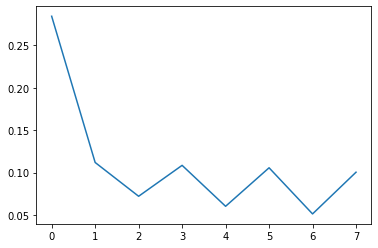

In [99]:
plt.plot(history.history["loss"])

In [88]:
model.save(LTSM_SAVE_PATH+"ltsm",save_format="h5")

# Making feature vector for Classic algorithms

In [9]:
def make_features(email_words_indexes):
    features = np.zeros(len(tokenizer.word_index)-1,dtype=int)
    for word_index in email_words_indexes :
        if word_index!=1: features[word_index-2]=1
    return features

In [10]:
X_train_classic, X_test_classic, y_train_classic, y_test_classic = train_test_split(X, Y, test_size=0.3)

In [11]:
y_train_classic = np.array(y_train_classic)
y_test_classic = np.array(y_test_classic)

In [12]:
X_train_classic = np.array([make_features(x) for x in X_train_classic])
X_test_classic = np.array([make_features(x) for x in X_test_classic])

# Deep neural network

In [13]:
early_stop_dnnt = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    verbose=1,
    patience=6,
    mode='max',
    restore_best_weights=True
)

In [14]:
deep_neural_net_model = tf.keras.Sequential([
    tf.keras.layers.Input(len(tokenizer.word_index)-1),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(1,activation="sigmoid")    
])
deep_neural_net_model.compile("adam", "binary_crossentropy", metrics=["accuracy"])

In [15]:
deep_neural_net_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                633088    
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 635,201
Trainable params: 635,201
Non-trainable params: 0
_________________________________________________________________


In [16]:
history_deep_nnt = deep_neural_net_model.fit(X_train_classic, y_train_classic,batch_size =16, epochs=20, validation_data=(X_test_classic, y_test_classic),callbacks=[early_stop_dnnt])

Epoch 1/20
409/409 [==============================] - 2s 4ms/step - loss: 0.1433 - accuracy: 0.9517 - val_loss: 0.0748 - val_accuracy: 0.9783
Epoch 2/20
409/409 [==============================] - 1s 3ms/step - loss: 0.0393 - accuracy: 0.9844 - val_loss: 0.0745 - val_accuracy: 0.9800
Epoch 3/20
409/409 [==============================] - 1s 3ms/step - loss: 0.0231 - accuracy: 0.9878 - val_loss: 0.0990 - val_accuracy: 0.9790
Epoch 4/20
409/409 [==============================] - 1s 4ms/step - loss: 0.0184 - accuracy: 0.9882 - val_loss: 0.1108 - val_accuracy: 0.9772
Epoch 5/20
409/409 [==============================] - 1s 4ms/step - loss: 0.0214 - accuracy: 0.9878 - val_loss: 0.1426 - val_accuracy: 0.9765
Epoch 6/20
409/409 [==============================] - 2s 4ms/step - loss: 0.0330 - accuracy: 0.9852 - val_loss: 0.1200 - val_accuracy: 0.9779
Epoch 7/20
409/409 [==============================] - 1s 4ms/step - loss: 0.0173 - accuracy: 0.9901 - val_loss: 0.1453 - val_accuracy: 0.9758
Epoch 

In [17]:
deep_neural_net_model.evaluate(X_test_classic,y_test_classic)

88/88 [==============================] - 0s 3ms/step - loss: 0.0745 - accuracy: 0.9800


[0.0745275467634201, 0.980035662651062]

In [18]:
deep_neural_net_model.save(DEEP_NEURAL_NET_SAVE_PATH+"deep_nnt",save_format="h5")

# SVM

In [23]:
C = 0.7
svc = svm.SVC(kernel='linear', C=C)
classf = svc.fit(X_train_classic, np.squeeze(y_train_classic))

In [25]:
p = classf.predict(X_test_classic)

In [28]:
prcision = np.mean(p==y_test_classic)*100
prcision

97.25490196078431

## Decision tree

In [33]:
model = DecisionTreeClassifier()
# Entrainer le modèle
model = model.fit(X_train_classic, np.squeeze(y_train_classic))
# Prediction
y_pred_tree = model.predict(X_test_classic)

In [34]:
prcision_of_tree = np.mean(y_pred_tree==y_test_classic)*100
prcision_of_tree

94.97326203208556

## Random forest

In [42]:
randforest = RandomForestClassifier(max_depth=23, random_state=0)
randforest.fit(X_train_classic, np.squeeze(y_train_classic))
y_pred_rand_forrest = randforest.predict(X_test_classic)

In [43]:
prcision_of_rand_forrest = np.mean(y_pred_rand_forrest==y_test_classic)*100
prcision_of_rand_forrest

94.75935828877006

## KNN

In [44]:
def euclidean_distance(X1, X2):
    # Returns the euclidean distance between all elements of X1 and X2 with the help of broadcasting
    #print("shape of X1 : ",X1.shape , "Shape of X2",X2.shape)
    X = ((X1-X2)**2).sum(axis=-1)
    #print("shape of Result : ",X.shape)
    return np.sqrt(X)

def numpy_euc_dist_V2(X1,X2):

    a = np.expand_dims(np.sum(X1**2,axis=1),axis = 0)
    b = np.expand_dims(np.sum(X2**2,axis=1),axis=-1)
    ab = np.matmul(X2, X1.T)
    return np.sqrt(a+b-2*ab)

def countDeletedIndexes(indexes, i):
    return np.count_nonzero(indexes[indexes != -1] < i)


def getKsmallestDistences(distences, k):
    indexes = np.fromfunction(lambda i: i-i-1, shape=(k,), dtype=np.int16)
    mask = np.fromfunction(lambda i: i == i, (len(distences),))
    for i in range(k):
        argmin = np.argmin(distences[mask])
        indexes[i] = argmin + countDeletedIndexes(indexes, argmin)
        mask[indexes[i]] = False
    return indexes


def getClass(Y, knearindexes):
    counts = np.bincount(Y[knearindexes])
    return np.argmax(counts)

def getClassProba(Y , knearindexes):
    n_classes = len(np.unique(Y))
    counts = np.bincount(Y[knearindexes] , minlength=n_classes)
    cls = []
    for i in range(n_classes):
        cls.append(float(counts[i]) / (counts.sum()))
    return np.array(cls)

def KPP(x, X, Y, k, showfirstnearest=False):
    if x.ndim == 1 :
        distences = euclidean_distance(X, x)
        knearestIndexes = getKsmallestDistences(distences, k)
        if showfirstnearest and k >= 10:
            plt.imshow(x.reshape((20, 20)), cmap='gray')
            plt.figure(figsize=(15, 8))
            for i in range(k):
                c = knearestIndexes[i]
                a = X[c, :].reshape((20, 20))
                a = np.transpose(a)
                plt.subplot(1, k, i+1)
                plt.title('label ' + str(Y[c]))
                plt.imshow(a, cmap='gray')
        return getClass(Y, knearestIndexes)
    else :
        def calcClass(x):
            distences = euclidean_distance(X, x)
            knearestIndexes = getKsmallestDistences(distences, k)
            return getClass(Y, knearestIndexes)
        
        return np.apply_along_axis(calcClass,axis=1,arr=x)

def Parallel_KPP(x, X, Y, k, showfirstnearest=False):
    if x.ndim == 1 :
        distences = euclidean_distance(X, x)
        knearestIndexes = getKsmallestDistences(distences, k)
        if showfirstnearest and k >= 10:
            plt.imshow(x.reshape((20, 20)), cmap='gray')
            plt.figure(figsize=(15, 8))
            for i in range(k):
                c = knearestIndexes[i]
                a = X[c, :].reshape((20, 20))
                a = np.transpose(a)
                plt.subplot(1, k, i+1)
                plt.title('label ' + str(Y[c]))
                plt.imshow(a, cmap='gray')
        return getClass(Y, knearestIndexes)
    else :
        distences = numpy_euc_dist_V2(X, x)
        def calcClass(i):
            distence = distences[i]
            knearestIndexes = getKsmallestDistences(distence, k)
            return getClass(Y, knearestIndexes)
        
        return np.array([calcClass(i) for i in range(len(x))])


def Probability_KPP(x, X, Y, k, showfirstnearest=False):
    if x.ndim == 1 :
        distences = euclidean_distance(X, x)
        knearestIndexes = getKsmallestDistences(distences, k)
        if showfirstnearest and k >= 10:
            plt.imshow(x.reshape((20, 20)), cmap='gray')
            plt.figure(figsize=(15, 8))
            for i in range(k):
                c = knearestIndexes[i]
                a = X[c, :].reshape((20, 20))
                a = np.transpose(a)
                plt.subplot(1, k, i+1)
                plt.title('label ' + str(Y[c]))
                plt.imshow(a, cmap='gray')
        return getClassProba(Y, knearestIndexes)
    else :
        def calcClass(x):
            distences = euclidean_distance(X, x)
            knearestIndexes = getKsmallestDistences(distences, k)
            return getClassProba(Y, knearestIndexes)
        return np.apply_along_axis(calcClass,axis=1,arr=x)


In [55]:
Y_pred_Knn = KPP(X_test_classic, X_train_classic, np.squeeze(y_train_classic), 3)

In [56]:
prcision_of_knn = np.mean(Y_pred_Knn==y_test_classic)*100
prcision_of_knn

80.89126559714795